In [1]:
import os
new_directory = 'D:\MSCS\CS455 Algorithm\Pattern Recognition'
os.chdir(new_directory)

In [14]:
os.getcwd()

'D:\\MSCS\\CS455 Algorithm\\Pattern Recognition'

## 1. Noise reduction by blurring
 &nbsp; &nbsp; a.Noise reduction is performed to distinguish the edge of each object in the image  
 &nbsp; &nbsp; b.Install OpenCV package

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display, Image

In [3]:
print(cv2.__version__)

4.8.0


&nbsp; &nbsp; c.Noise reduction is performed by applying Gaussian Filter

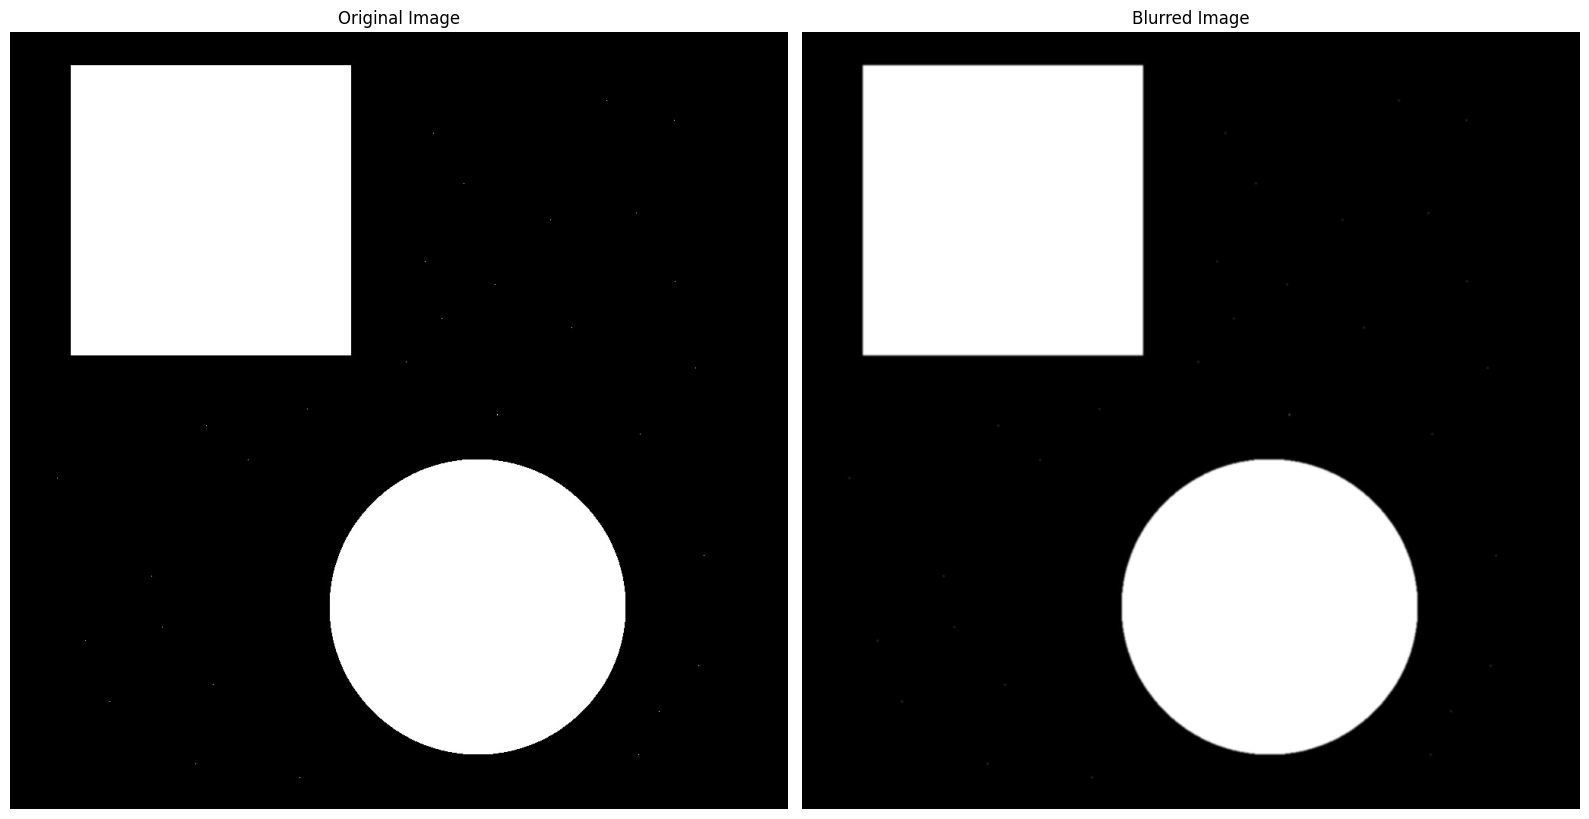

In [13]:
image = cv2.imread('e_noise.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Display original image
plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## 2. Histogram
&nbsp; &nbsp; a.Histogram is used to determine the threshold value that will be used for the next step  

&nbsp; &nbsp; b.Create a code to plot histogram

In [27]:
from matplotlib import pyplot as plt

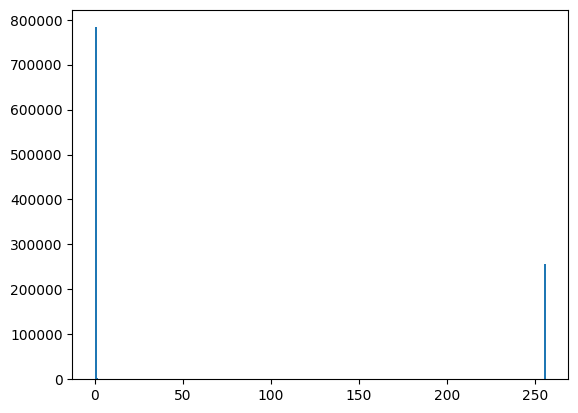

In [47]:
img = cv2.imread('e_noise.jpg',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

 &nbsp; &nbsp; c.Explanation\
 &nbsp; &nbsp; &nbsp; <span style = "font-weight:bold;">plt.hist()</span> finds the histogram and plot it\
 &nbsp; &nbsp; &nbsp; <span style = "font-weight:bold;">ravel()</span> changes 2D/multi-dimensional array to contiguous flattened array\
 &nbsp; &nbsp; &nbsp; <span style = "font-weight:bold;">256</span> = number of pixels

&nbsp; &nbsp; d.Output\
&nbsp; &nbsp; &nbsp; The output is shown in the above.

## 3. Thresholding
&nbsp; &nbsp; &nbsp;a.In Otsu's thresholding, it iterates through all possible threshold values and calculates the spread measurement for the pixel levels for each threshold. Its goal is to find the threhsold value where the sum of the foreground and background spreads are at the minimum 

&nbsp; &nbsp; &nbsp;b.Added lines of code 

In [29]:
# Global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

In [30]:
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [42]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [48]:
# plot all the images and their histograms
images = [img, 0, th1, 
          img, 0, th2, 
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding(v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

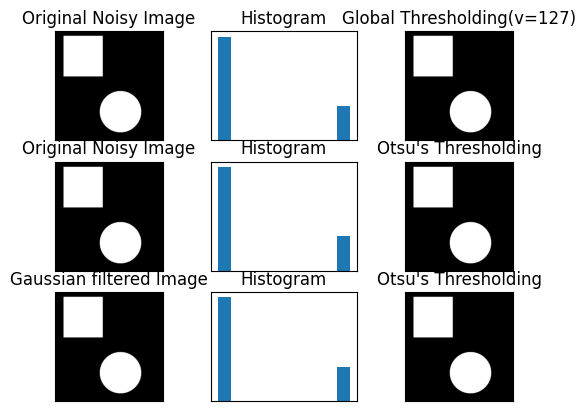

In [50]:
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel())
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

&nbsp; &nbsp; c.Explanation\
 &nbsp; &nbsp; &nbsp; <span style = "font-weight:bold;">threshold()</span> applies fixed-level thresholding to a multiple-channel array. It is typically used to get a binary image out of a grayscale image or for removing noise by filtering out pixels with too small or too large values.\
&nbsp; &nbsp; &nbsp;<span style = "font-weight:bold;">THRESH_BINARY</span>
$$
dst(x, y) = \begin{cases}
    maxval, & \text{if } src(x,y) \gt thresh \\
    0, & \ otherwise
\end{cases}
$$
&nbsp; &nbsp; &nbsp;<span style = "font-weight:bold;">THRES_OTSU</span> uses the Otsu algorithm to choose the optimal threshold value. It is implemented only for 8-bit single-channel images.\
&nbsp; &nbsp; &nbsp;<span style = "font-weight:bold;">Gaussianblur()</span> blurs an image using a Gaussian filter, like we used in Step 1.

&nbsp; &nbsp;d.Output\
&nbsp; &nbsp; &nbsp; The output is shown above.

## 4. Connectivity Analysis
&nbsp; &nbsp; a.This step distinguishes separate objects in an image by using either a 4-pixel or 8-pixel
connectivity. 4-pixel connects pixels with the same value along the edges. 8-pixel does
the same with the addition of edges and corners.

&nbsp; &nbsp; b.Added lines of code

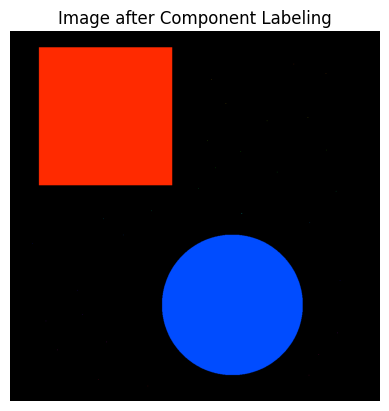

In [53]:
def connected_component_label(path):
 # Getting the input image
    img = cv2.imread('e_noise.jpg', 0)
 # Converting those pixels with values 1-127 to 0 and others to 1
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
 # Applying cv2.connectedComponents()
    num_labels, labels = cv2.connectedComponents(img)
 # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
 # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
 # set bg label to black
    labeled_img[label_hue==0] = 0
 #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()
    
img = cv2.imread('e_noise.jpg', 0)
connected_component_label(img)

&nbsp; &nbsp; c.Explanation\
&nbsp; &nbsp; &nbsp; The above uses a classical algorithm with makes two passes. First to record equivalences
and assign temporary labels. Second to replace the temporary labels with the label of its
equivalent class. 

&nbsp; &nbsp; d.Output\
&nbsp; &nbsp; &nbsp; The results are shown above. Different objects are assigned different colors.

## 5. Pattern Recognition
&nbsp; &nbsp; a.This step is to recognize what kind of objects are in the picture

&nbsp; &nbsp; b.Install

In [56]:
!pip install cvlib

     ---------------------------------------- 13.1/13.1 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046378 sha256=8756fe4184a4b3187f6d895c8057eb7b8ca1aa071bc46f8df4673c4c51f9c884
  Stored in directory: c:\users\odody\appdata\local\pip\cache\wheels\2c\b4\91\c6ddd31550a14fec141d21053f4a6fe5729c41aaf991baf2bc
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=3053c58e8d225c9180c7a525122cb8869f40dbb7e56e968af978d8b1ba06a149
  Stored in directory: c:\users\odody\appdata\local\pip\cache\wheels\c2\02\32\f3617a9f68bcc67eda3ebeb4514eba18f62e81ff439428109d
  Created wheel for progressbar: filename=progressbar

&nbsp; &nbsp; c.Added lines of code

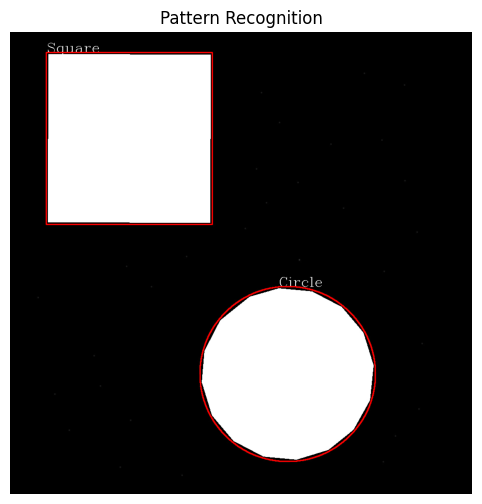

In [11]:
img = cv2.imread('e_noise.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(img,(5,5),0)
font = cv2.FONT_HERSHEY_COMPLEX
_, threshold = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    cv2.drawContours(blur, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    if len(approx) == 4:
        cv2.putText(blur, "Square", (x,y), font, 1, (255))
    else:
        cv2.putText(blur, "Circle", (x,y), font, 1, (255))

img_bgr = cv2.cvtColor(blur, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_bgr, contours, -1, (255,0,0), 2)

plt.figure(figsize=(8, 6))
plt.imshow(img_bgr)
plt.title('Pattern Recognition')
plt.axis('off')
plt.show()

&nbsp; &nbsp; d.Explanation\
&nbsp; &nbsp; &nbsp; Threshold was used to get a black and white image, then the contours or boundaries of
the shapes were found. Using the contours, the coordinates for each shape is known. By
approximating the contours, we can find the name of the shape of the object.\
&nbsp; &nbsp; &nbsp;<span style = "font-weight:bold;"> len(approx) == ?? </span> can be changed into different numbers (e.g. 3 for Triangle)\
&nbsp; &nbsp; &nbsp;<span style = "font-weight:bold;"> 6 < len(approx) < 15 </span> is for ellipse or oval\
&nbsp; &nbsp; &nbsp;<span style = "font-weight:bold;">img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) </span> is to convert the black and white
image and contour back to colored

&nbsp; &nbsp; e.Output\
&nbsp; &nbsp; &nbsp; The output is shown above.

## Reference:
Histogram\
&nbsp; &nbsp; &nbsp; &nbsp; https://opencv-pythontutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html
\
Threshold\
&nbsp; &nbsp; &nbsp; &nbsp; https://opencv-pythontutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a147222a96556ebc1d948b372bcd7ac59
\
Connectivity analysis\
&nbsp; &nbsp; &nbsp; &nbsp; https://iq.opengenus.org/connected-component-labeling/
\
&nbsp; &nbsp; &nbsp; &nbsp; https://github.com/yashml/OpenGenus_Articles_Code/tree/master/Connected%20Component%20Labeling
\
Pattern recognition\
&nbsp; &nbsp; &nbsp; &nbsp; https://pysource.com/2018/09/25/simple-shape-detection-opencv-with-python-3/